In [2]:
#Now here I have imported all the necessory libraries for this model to run

import pandas as pd 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import pickle, datetime
import numpy as np 
import matplotlib.pyplot as plt
import os
import shutil
from keras.preprocessing import image
from keras import *
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D,Activation
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from sklearn import metrics
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import LSTM, Input,Activation
from keras.optimizers import RMSprop, SGD, Adam 
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Import the backend
from keras import backend as K

import os

Using TensorFlow backend.


# Loading Images

In [5]:
#This is the path where my dataset has been stored and splitted into train and test folders inside thr DS3 filename

img_dir='DS3'
training_data_images = []
training_data_labels = [] 

for img_path in glob.glob(os.path.join(img_dir,'*.jpeg')):

    data_label = img_path.split("\\")[-1]

    img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    training_data_images.append(img)
    training_data_labels.append(data_label[0:data_label.find('#')])
training_data_images = np.array(training_data_images)
training_data_labels = np.array(training_data_labels)

# Preprocessing

In [6]:
#Now here I Loaded the dataset for all three classes and resize each image to (32 x 32) as mentioned in the problem
# and Applied the required preprocessing steps to employ the data into Machine Learning / Deep Learning algorithms.
train_label_num = np.array([label_to_num[x] for x in training_data_labels])
label_to_num = {v:i for i,v in enumerate(np.unique(training_data_labels))}
num_to_label = {v: k for k, v in label_to_num.items()}

In [6]:
training_data_images.shape, train_label_num.shape, training_data_labels.shape

((1500, 32, 32, 3), (1500,), (1500,))

In [7]:
from sklearn.model_selection import train_test_split
x_training, x_testing, y_training, y_testing = train_test_split(training_data_images, train_label_num, test_size = 0.2, shuffle=True, random_state=2)

In [8]:
n_class=len(label_to_num)

In [9]:
print(x_training.shape, y_training.shape, x_testing.shape, y_testing.shape, n_class)

(1200, 32, 32, 3) (1200,) (300, 32, 32, 3) (300,) 3


In [10]:
#Normalization of the images and one-hot encoding of the labels

x_training_normalized = np.array(x_train / 255.0 - 0.5 )
x_testing_normalized = np.array(x_test / 255.0 - 0.5 )

label_binarizer = LabelBinarizer()
y_training_hot = label_binarizer.fit_transform(y_train)
y_testing_hot = label_binarizer.fit_transform(y_test)

# CNN Model

In [11]:
def cnn_model(input_shape,nb_classes):
    
    model = Sequential() 
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))


    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(GlobalAveragePooling2D()) 
    model.add(Dense(1024, init='glorot_normal')) 
    model.add(Activation('relu')) 
    model.add(Dropout(0.5)) 

    model.add(Dense(1024, init='glorot_normal')) 
    model.add(Activation('relu'))
    model.add(Dropout(0.5))


    model.add(Dense(nb_classes, init='glorot_normal')) 
    model.add(Activation('tanh'))

    return model

In [12]:
cnn_model = cnn_model((32,32,3),n_class)
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)        

<ipython-input-11-29bbb073e0ae>:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, kernel_initializer="glorot_normal")`
  model.add(Dense(1024, init='glorot_normal'))
<ipython-input-11-29bbb073e0ae>:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, kernel_initializer="glorot_normal")`
  model.add(Dense(1024, init='glorot_normal'))
<ipython-input-11-29bbb073e0ae>:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, kernel_initializer="glorot_normal")`
  model.add(Dense(nb_classes, init='glorot_normal'))


In [13]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [14]:
#Training the CNN model with the normalized image data and labels
cnn_model.fit(x_training_normalized, y_training_hot, batch_size=15, epochs=5,verbose=1, validation_data=[x_testing_normalized,y_testing_hot])

Train on 1200 samples, validate on 300 samples
Epoch 1/5
1200/1200 [==============================] - 16s 13ms/step - loss: 8.9995 - accuracy: 0.3292 - val_loss: 10.5305 - val_accuracy: 0.3600
Epoch 2/5
1200/1200 [==============================] - 16s 13ms/step - loss: 9.6709 - accuracy: 0.3267 - val_loss: 5.9100 - val_accuracy: 0.3633
Epoch 3/5
1200/1200 [==============================] - 17s 14ms/step - loss: 9.5365 - accuracy: 0.3250 - val_loss: 5.8025 - val_accuracy: 0.3600
Epoch 4/5
1200/1200 [==============================] - 16s 13ms/step - loss: 9.9664 - accuracy: 0.3258 - val_loss: 5.8025 - val_accuracy: 0.3633
Epoch 5/5
1200/1200 [==============================] - 15s 13ms/step - loss: 9.6037 - accuracy: 0.3242 - val_loss: 5.8025 - val_accuracy: 0.3600


In [15]:
layer_name = 'dense_1'
FC_layer_model = Model(inputs=cnn_model.input,
                                 outputs=cnn_model.get_layer(layer_name).output)

# Feature Extraction

In [16]:

#Now here I have extrated the features constructed by the convolutional layers from an intermediate dense layer
i=0
features=np.zeros(shape=(1500,1024))

for img_path in glob.glob(os.path.join(img_dir,'*.jpeg')):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)    
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = np.expand_dims(img, axis=0)
    FC_output = FC_layer_model.predict(img)
    features[i]=FC_output
    i+=1
    if i==1500:
        break

In [18]:
feature_names=[]
for i in range(1024):
    feature_names.append("col_"+str(i))
    i+=1

In [19]:
#Create DataFrame with features and coloumn name
training_features=pd.DataFrame(data=features,columns=feature_names)
feature_names = np.array(feature_names)

In [21]:
from sklearn.model_selection import train_test_split
x_training_1, x_testing_1, y_training_1, y_testing_1 = train_test_split(training_features, train_label_num, test_size = 0.2, shuffle=True, random_state=2)

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_training_1, y_training_1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
y_pred = classifier.predict(x_testing_1)

In [24]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(classifier, '1097663-Knn.pkl')

c:\users\003560\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['student-id-Knn.pkl']

In [25]:
#Evaluating Model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_testing_1, y_pred))
print(classification_report(y_testing_1, y_pred))

[[ 90   0   0]
 [  1 107   0]
 [  0   0 102]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.99      1.00       108
           2       1.00      1.00      1.00       102

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [26]:
accuracy=accuracy_score(y_testing_1,y_pred)
print('KNN- Accuracy:', accuracy*100, '%.')

KNN- Accuracy: 99.66666666666667 %.


In [27]:
error = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_training_1, y_training_1)
    pred_i = knn.predict(x_testing_1)
    error.append(np.mean(pred_i != y_testing_1))

Text(0, 0.5, 'Mean Error')

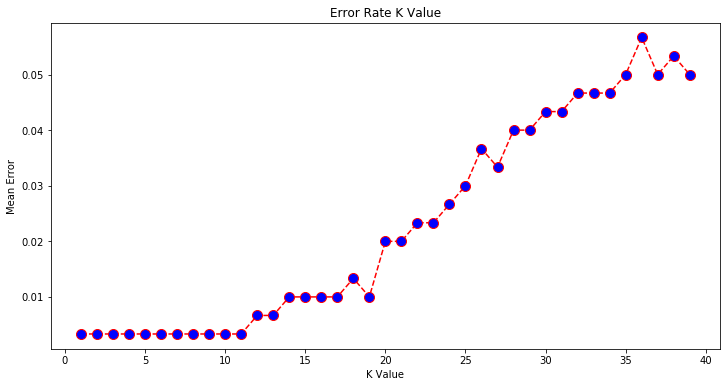

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='res', markersize=10)
plt.title(' The value Error Rate in the K Value')
plt.xlabel('The K Value')
plt.ylabel(' TheMean Error')

# Random Forest

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint

In [30]:
model_params={
# Number of trees in random forest
'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
# Number of features to consider at every split
'max_features' : ['auto', 'sqrt'],

# Minimum number of samples required to split a node
'min_samples_split' : [2, 5, 10],
# Minimum number of samples required at each leaf node
'min_samples_leaf' : [1, 2, 4] }

In [31]:
# creating random forest model
rf_model = RandomForestClassifier()

# consturct random search 
clf = RandomizedSearchCV(rf_model, model_params, n_iter=2, cv=3, random_state=1)

model = clf.fit(x_training_1, y_training_1)

# printing best set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [32]:
from sklearn.externals import joblib
  # Save the model as a pickle in a file
joblib.dump(model, '1097663-Rf.pkl')

['student-id-Rf.pkl']

In [33]:
# predictions using the best-performing model
predictions = model.predict(x_testing_1)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_testing_1, predictions))
print(classification_report(y_testing_1, predictions))

[[ 90   0   0]
 [  0 108   0]
 [  0   0 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       102

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [35]:
accuracy=accuracy_score(y_testing_1,predictions)
print('RF- Accuracy:', accuracy*100, '%.')

RF- Accuracy: 100.0 %.
